# How to interpret the cortical response modes?

In my dissertation Chapter 4, Section 4, I do a 'cortical response mode' analysis that looks at all oscillatory powers together across the scalp.
How do we interpret that?


In [17]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [89]:
# the main coordination
pc0 = 0.9*np.array([1.0,1.0,1.0,1.0,0.0])
pc1 = 0.43*-np.array([1.0,-0.8,-0.5,0.9,0.0])

<Figure size 432x288 with 0 Axes>

(5, 257)


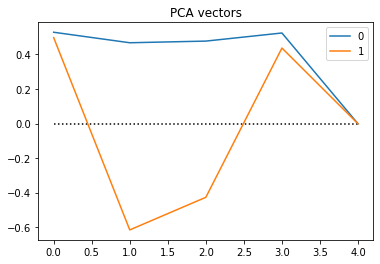

In [90]:
channel_activations = np.random.choice([-1.,0.,1],p=(1/10,17/20,1/20),size=(257,2))
coords = np.vstack((pc0,pc1)).T

response = np.dot(coords,channel_activations.T)
response +=  np.random.normal(0,0.01,size=response.shape)
plt.figure()
plt.show()
print(response.shape)

from sklearn.decomposition import PCA

model = PCA().fit(response.T)
vects = model.components_

plt.figure()
for ii in range(2):
    plt.plot(vects[ii,:],label=ii)
plt.hlines(0,0,4,linestyle='dotted',color='black')
plt.title('PCA vectors')
plt.legend()
plt.show()

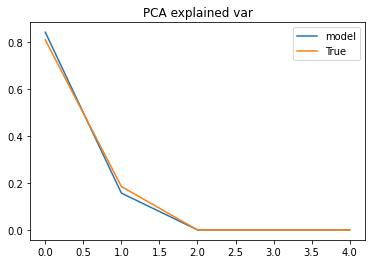

In [92]:
plt.figure()
plt.plot(model.explained_variance_ratio_,label='model')
plt.plot(np.array([0.9**2,0.43**2,0.,0.,0.]),label='True')
plt.title('PCA explained var')
plt.legend()